### DSC 550 Week  : 
#### Activity 5.2 
#### Author: Brian Reppeto 4/9/2024

In [1]:
# import libraries

import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc

In [2]:
# import movie file

data_path='labeledTrainData.tsv'
movie_df=pd.read_csv(data_path, delimiter='\t')

In [3]:
# head new df

movie_df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
# create function to classify sentiment

def classify_review(review):
    blob=TextBlob(review)
    return 'positive' if blob.sentiment.polarity >= 0 else 'negative'

In [5]:
# apply function to each review

movie_df['predicted_sentiment']=movie_df['review'].apply(classify_review)

In [6]:
# create function to change the calc sent to number

def classify_review(review):
    blob=TextBlob(review)
    return 1 if blob.sentiment.polarity >= 0 else 0


In [7]:
# apply function to each review

movie_df['predicted_sentiment_num']=movie_df['review'].apply(classify_review)

In [8]:
# head df

movie_df.head()

,id,sentiment,review,predicted_sentiment,predicted_sentiment_num
0,5814_8,1,With all this stuff going down at the moment w...,positive,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",positive,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,negative,0
3,3630_4,0,It must be assumed that those who praised this...,positive,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,negative,0


In [9]:
# convert text to lowercase

movie_df['review']=movie_df['review'].str.lower()

In [10]:
# head column

movie_df['review'].head(15)

0     with all this stuff going down at the moment w...
1     \the classic war of the worlds\" by timothy hi...
2     the film starts with a manager (nicholas bell)...
3     it must be assumed that those who praised this...
4     superbly trashy and wondrously unpretentious 8...
5     i dont know why people think this is such a ba...
6     this movie could have been very good, but come...
7     i watched this video at a friend's house. i'm ...
8     a friend of mine bought this film for £1, and ...
9     <br /><br />this movie is full of references. ...
10    what happens when an army of wetbacks, towelhe...
11    although i generally do not like remakes belie...
12    \mr. harvey lights a candle\" is anchored by a...
13    i had a feeling that after \submerged\", this ...
14    note to george litman, and others: the mystery...
Name: review, dtype: object

In [11]:
# Remove punctuation and special characters

movie_df['review']=movie_df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if pd.notnull(x) else x)

In [12]:
# head df

movie_df.head(15)

,id,sentiment,review,predicted_sentiment,predicted_sentiment_num
0,5814_8,1,with all this stuff going down at the moment w...,positive,1
1,2381_9,1,the classic war of the worlds by timothy hines...,positive,1
2,7759_3,0,the film starts with a manager nicholas bell g...,negative,0
3,3630_4,0,it must be assumed that those who praised this...,positive,1
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,negative,0
5,8196_8,1,i dont know why people think this is such a ba...,positive,1
6,7166_2,0,this movie could have been very good but comes...,negative,0
7,10633_1,0,i watched this video at a friends house im gla...,positive,1
8,319_1,0,a friend of mine bought this film for 1 and ev...,positive,1
9,8713_10,1,br br this movie is full of references like ma...,positive,1


In [13]:
# Remove stop words

# download stop words

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianreppeto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianreppeto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# load stop words

stop_words = set(stopwords.words('english'))

In [15]:
# function to remove stopwords

def remove_stopwords(text):
    if pd.notnull(text):
        # Tokenize the text string
        word_tokens = word_tokenize(text)
        # Remove stop words
        filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
        # Rejoin words
        return ' '.join(filtered_sentence)
    return text

# apply function to remove stop words from the column

movie_df['review'] = movie_df['review'].apply(remove_stopwords)

In [16]:
# head df

movie_df.head()

,id,sentiment,review,predicted_sentiment,predicted_sentiment_num
0,5814_8,1,stuff going moment mj ive started listening mu...,positive,1
1,2381_9,1,classic war worlds timothy hines entertaining ...,positive,1
2,7759_3,0,film starts manager nicholas bell giving welco...,negative,0
3,3630_4,0,must assumed praised film greatest filmed oper...,positive,1
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...,negative,0


In [17]:
# apply NLTK porterstemmer

# initialize the porterstemmer

stemmer = PorterStemmer()

In [18]:
# function to stem words in the text

def stem_text(text):
    if pd.notnull(text):
        
        # tokenize the text string into words
        
        word_tokens = word_tokenize(text)
        
        # stem each word
        
        stemmed_words = [stemmer.stem(word) for word in word_tokens]
        
        # rejoin the stemmed words into a single string
        
        return ' '.join(stemmed_words)
    return text


movie_df['review'] = movie_df['review'].apply(stem_text)

In [19]:
# head df

movie_df.head(15)

,id,sentiment,review,predicted_sentiment,predicted_sentiment_num
0,5814_8,1,stuff go moment mj ive start listen music watc...,positive,1
1,2381_9,1,classic war world timothi hine entertain film ...,positive,1
2,7759_3,0,film start manag nichola bell give welcom inve...,negative,0
3,3630_4,0,must assum prais film greatest film opera ever...,positive,1
4,9495_8,1,superbl trashi wondrous unpretenti 80 exploit ...,negative,0
5,8196_8,1,dont know peopl think bad movi got pretti good...,positive,1
6,7166_2,0,movi could good come way short cheesi special ...,negative,0
7,10633_1,0,watch video friend hous im glad wast money buy...,positive,1
8,319_1,0,friend mine bought film 1 even grossli overpr ...,positive,1
9,8713_10,1,br br movi full refer like mad max ii wild one...,positive,1


In [20]:
# Splitting the dataset into training and testing sets

train_df, test_df = train_test_split(movie_df, test_size=0.2, random_state=42)

In [21]:
# shapes of the training and testing sets to verify the split

train_df.shape, test_df.shape

((20000, 5), (5000, 5))

In [22]:
# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transforming the 'review' column
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['review'])

# Check the shape
X_train_tfidf.shape

(20000, 80932)

In [23]:
# Apply the TF-IDF transformation to the test set 
X_test_tfidf = tfidf_vectorizer.transform(test_df['review'])

# Check the shape 
X_test_tfidf.shape

(5000, 80932)

In [24]:
# Initializ the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the logistic regression model on the TF-IDF vectorized training data
# 'sentiment' column is the target variable
logistic_model.fit(X_train_tfidf, train_df['sentiment'])

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Evaluat the model's accuracy on the test set
test_accuracy = logistic_model.score(X_test_tfidf, test_df['sentiment'])

test_accuracy


0.8878

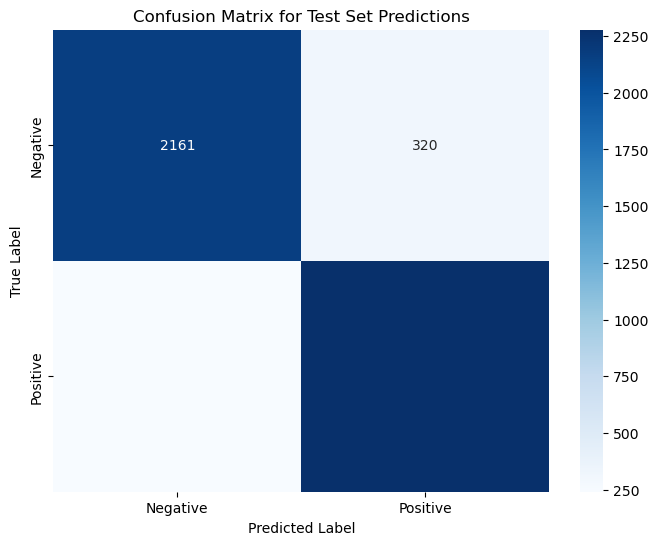

In [26]:
# Make predictions on the test set
test_predictions = logistic_model.predict(X_test_tfidf)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_df['sentiment'], test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Test Set Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# Calc precision, recall, and F1-score for the test set predictions
precision, recall, f1_score, _ = precision_recall_fscore_support(test_df['sentiment'], test_predictions, average='binary')

precision, recall, f1_score

(0.8768283294842186, 0.9043271139341008, 0.8903654485049834)

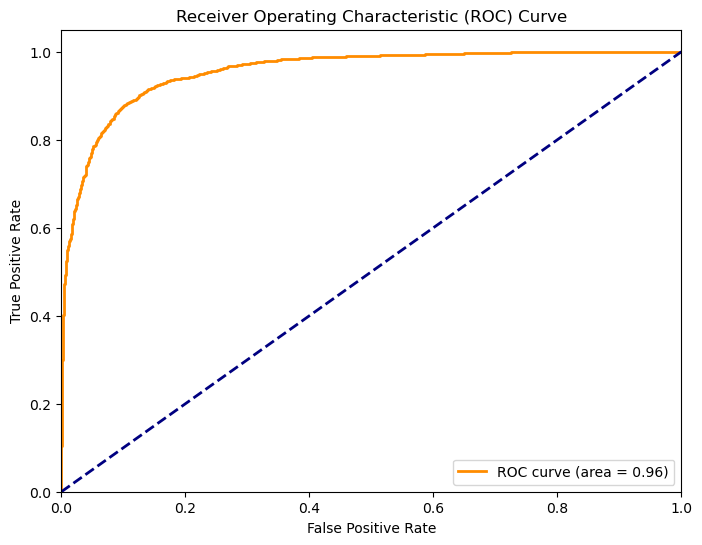

In [28]:
# Get the probabilities of positive class predictions
test_probabilities = logistic_model.predict_proba(X_test_tfidf)[:, 1]

# Calc ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_df['sentiment'], test_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Pick another classification model you learned about this week and repeat steps (5) – (9)

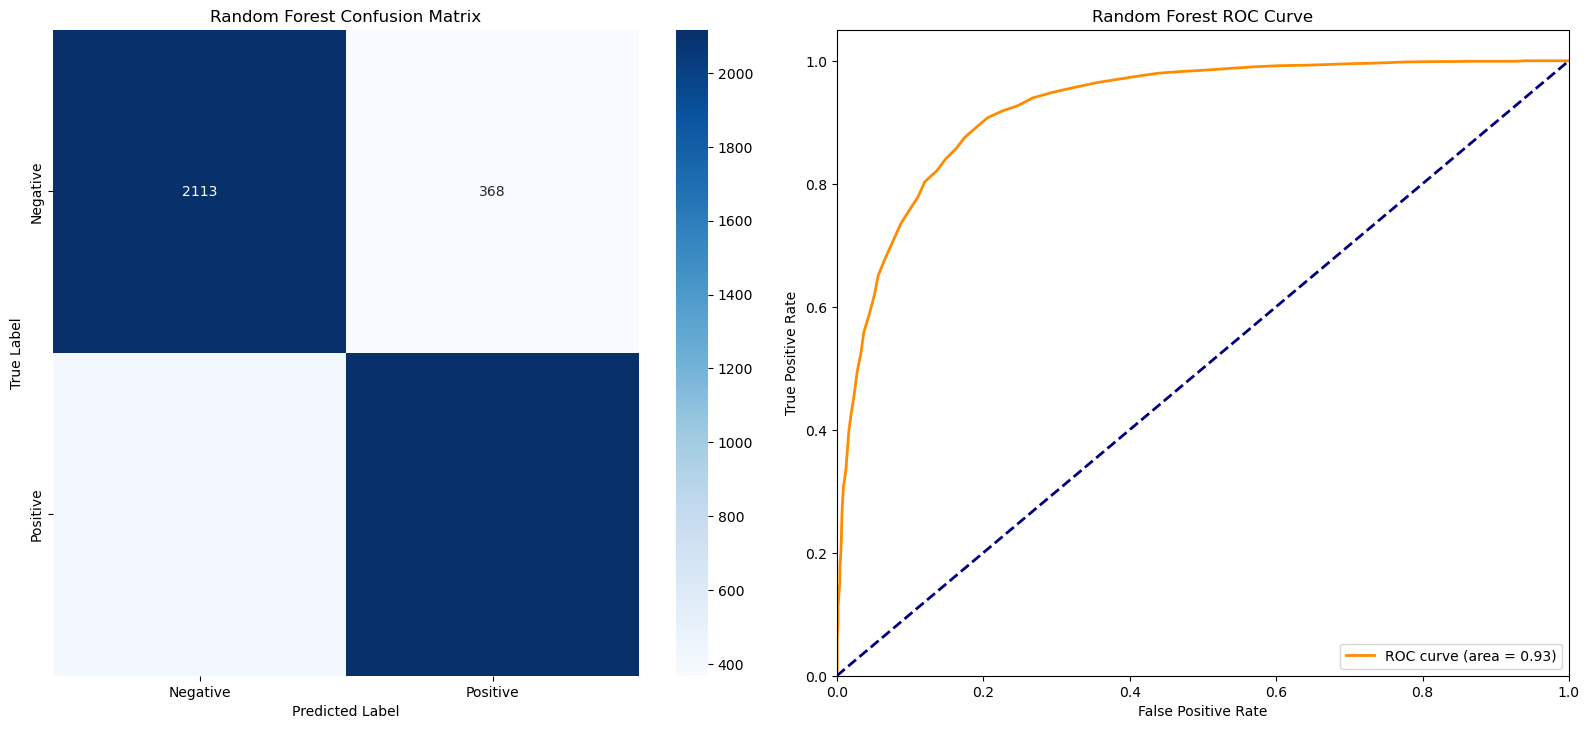

(0.8458, 0.8518518518518519, 0.8400158793171894, 0.8458924645212873)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the Random Forest model on the TF-IDF vectorized training data
random_forest_model.fit(X_train_tfidf, train_df['sentiment'])

# Evaluate the model's accuracy on the test set
rf_test_accuracy = random_forest_model.score(X_test_tfidf, test_df['sentiment'])

# Make predictions on the test set
rf_test_predictions = random_forest_model.predict(X_test_tfidf)

# Generate the confusion matrix
rf_conf_matrix = confusion_matrix(test_df['sentiment'], rf_test_predictions)

# Calc precision, recall, and F1-score
rf_precision, rf_recall, rf_f1_score, _ = precision_recall_fscore_support(test_df['sentiment'], rf_test_predictions, average='binary')

# Get the probabilities of positive class predictions for ROC curve
rf_test_probabilities = random_forest_model.predict_proba(X_test_tfidf)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_df['sentiment'], rf_test_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot metrics including the ROC curve
plt.figure(figsize=(16, 14))

# Confusion Matrix Plot
plt.subplot(2, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve Plot
plt.subplot(2, 2, 2)
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

(rf_test_accuracy, rf_precision, rf_recall, rf_f1_score)
